## Подготовка данных

### Открытие файла, импорт библиотек и анализ данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

warnings.filterwarnings('ignore')

import time

In [2]:
data = pd.read_csv('/datasets/autos.csv')
display(data.head())
data.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [3]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [4]:
print('Количество пропусков в данных:')
data.isna().sum()

Количество пропусков в данных:


DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [5]:
print('Дубликатов в данных:', data.duplicated().sum())

Дубликатов в данных: 4


In [6]:
data = data.drop_duplicates().reset_index(drop=True)

In [7]:
print('Последняя дата скачивания объявления:')
data['DateCrawled'].max()

Последняя дата скачивания объявления:


'2016-04-07 14:36:58'

In [8]:
print('Кол-во объявлений по типу кузова:')
data['VehicleType'].value_counts()

Кол-во объявлений по типу кузова:


sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [9]:
print('Кол-во объявлений по коробке передач:')
data['Gearbox'].value_counts()

Кол-во объявлений по коробке передач:


manual    268249
auto       66283
Name: Gearbox, dtype: int64

In [10]:
print('Кол-во объявлений по километражу:')
data['Kilometer'].value_counts()

Кол-во объявлений по километражу:


150000    238207
125000     36453
100000     14882
90000      11567
80000      10047
70000       8593
60000       7444
5000        6397
50000       6232
40000       4911
30000       4436
20000       3974
10000       1222
Name: Kilometer, dtype: int64

In [11]:
print('Кол-во объявлений по типу топлива:')
data['FuelType'].value_counts()

Кол-во объявлений по типу топлива:


petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [12]:
data['NotRepaired'].value_counts()

no     247158
yes     36053
Name: NotRepaired, dtype: int64

Для нормальной работы моделей нужно обработать данные:
- Автомобиль вряд ли будет стоить 0, потому надо найти квантили 0.05 и 0.9 в целевом признаке Price.
- Год выпуска не может быть больше 2016, ведь данные представлены за 2016 год максимум. Также вряд ли будут интересны автомобили младше 1950 года - они уже относятся к раритету скорее. Все неподходящие данные будут удалены.  
- Пропуски в признаке VehicleType необходимо обработать. Можно их заменить на самый популярный тип, каким является Седан, однако разные марки могут специализироваться на определенных кузовах, потому заполню пропуски наиболее популярным типом кузова в каждой марке.  
- Пропуски в признаке Gearbox заполню механической коробкой передач, как наиболее распространенной.  
- Кол-во лошадиных сил в моторе вряд ли реально будут меньше 30, как и неинтересны будут данные с кол-вом свыше 700, это редкие модели и масл кары, что представляет совсем иную категорию.  
- Пропуски в признаке Model заменю на 0.
- Из признака километража видно, что на сайте объявлений стоит ограничение максимальное в 150000, скорее всего означающее километраж свыше 150000км. И подавляющее большинство машин именно такие, ведь это пробег, когда заканивается точно уже гарантия производителя и часто машину выставляют на продажу для покупки новой. Рекомендовать бы сервису ввести больше возможностей выбора пользователям, но мы занимаемся другим.  
- Признаки RegistrationMonth, DateCreated, NumberOfPictures, PostalCode, LastSeen можно удалить, в них нетданных для обучения модели.  
- Пропуски в FuelType также можно заполнить наиболее популярным вообще, то есть бензином, но я заполню наиболее популярным у данной марки.  
- Очень много пропусков в признаке NotRepaired. Установлю по наиболее популярному, то есть "no".

### Обработка данных

Text(0.5, 1.0, 'Количество автомобилей в объявлениях по годам')

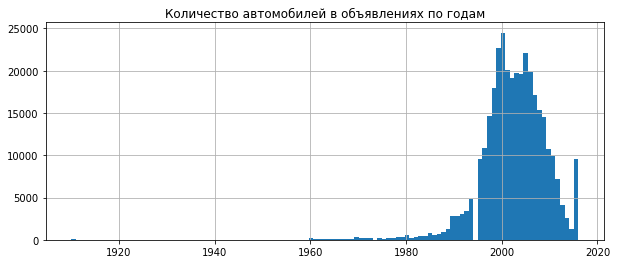

In [13]:
data = data.query('1900 < RegistrationYear < 2017').reset_index()
data['RegistrationYear'].hist(bins=111, figsize=(10,4))
plt.title('Количество автомобилей в объявлениях по годам')

Судя по гистограмме количество автомобилей в объявлениях меньше 1960 года практически отсутствует. Избавлюсь от них.

Text(0.5, 1.0, 'Количество автомобилей в объявлениях по годам')

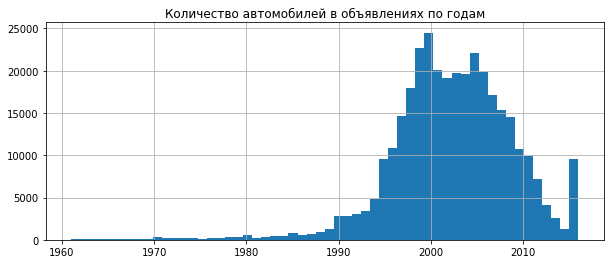

In [14]:
data = data.query('1960 < RegistrationYear').reset_index()
data['RegistrationYear'].hist(bins=56, figsize=(10,4))
plt.title('Количество автомобилей в объявлениях по годам')

In [15]:
data = data.query('Price > 0')
data['Price'].quantile([0.05, 0.9])

0.05      350.0
0.90    11700.0
Name: Price, dtype: float64

<AxesSubplot:>

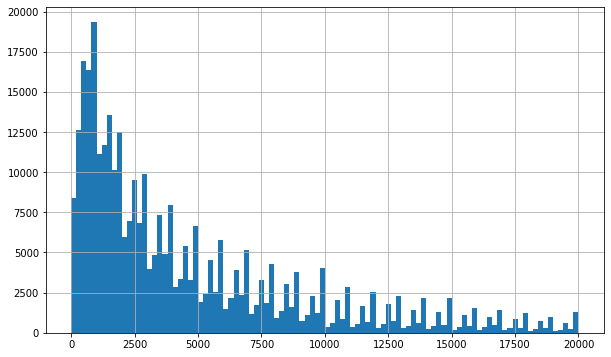

In [16]:
data['Price'].hist(bins=100, figsize=(10,6))

Для лучшего качества обучения моделей нужно взять стоимость автомобилей выше 350 и менее 11700 евро. То что меньше 350 - это уже "дрова", а что выше 11700 - высокая цена малого количества автомобилей, много выбросов.

Text(0.5, 1.0, 'Количество объявлений с авто по цене')

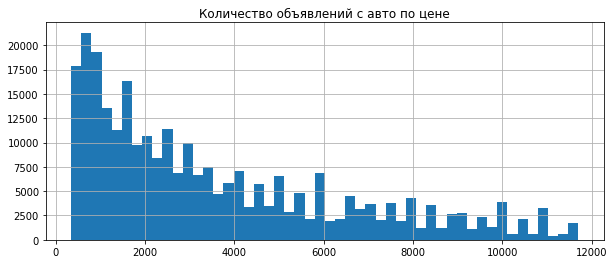

In [17]:
data = data.query('350 <= Price <= 11700')
data['Price'].hist(bins=50, figsize=(10,4))
plt.title('Количество объявлений с авто по цене')

In [18]:
data['Gearbox'] = data['Gearbox'].fillna('manual')
data['Model'] = data['Model'].fillna(0)
data['NotRepaired'] = data['NotRepaired'].fillna('no')

Text(0.5, 1.0, 'Количество объявлений с машинами по лошадиным силам')

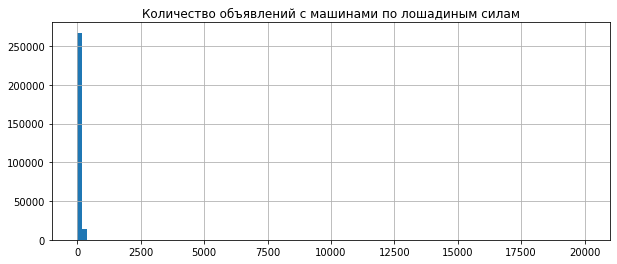

In [19]:
data['Power'].hist(bins=100,figsize=(10,4))
plt.title('Количество объявлений с машинами по лошадиным силам')

Text(0.5, 1.0, 'Количество объявлений с машинами по лошадиным силам')

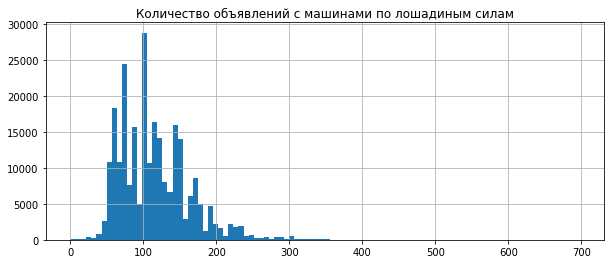

In [20]:
data = data.query('0 < Power < 700')
data['Power'].hist(bins=100,figsize=(10,4))
plt.title('Количество объявлений с машинами по лошадиным силам')

Из гистограммы видно, что автомобилей свыше 350 л.с. очень мало, удалим лишние данные.

Text(0.5, 1.0, 'Количество объявлений с машинами по лошадиным силам')

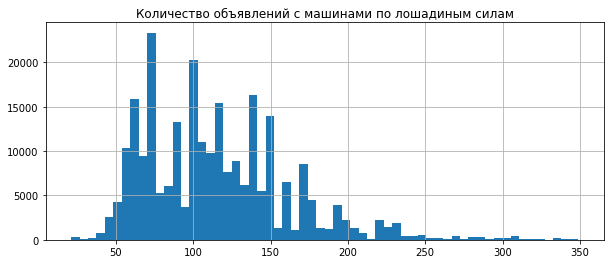

In [21]:
data = data.query('20 < Power < 350')
data['Power'].hist(bins=60,figsize=(10,4))
plt.title('Количество объявлений с машинами по лошадиным силам')

In [22]:
data["VehicleType"] = (data.groupby(['Brand', 'Model'])['VehicleType']
                           .transform(lambda x: x.fillna(value=(x.mode()[0] if not x.mode().empty else "111"))))
data["FuelType"] = (data.groupby(['Brand', 'Model'])['FuelType']
                        .transform(lambda x: x.fillna(value=(x.mode()[0] if not x.mode().empty else "111"))))

In [23]:
print('Кол-во объявлений по типу кузова')
data["VehicleType"].value_counts()

Кол-во объявлений по типу кузова


sedan          76078
small          66358
wagon          52083
bus            23780
convertible    14974
coupe          11271
suv             7082
other           2117
Name: VehicleType, dtype: int64

In [24]:
data.isna().sum()

level_0              0
index                0
DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [25]:
data = data[['Brand',
             'Model',
             'VehicleType', 
             'RegistrationYear',
             'Gearbox', 
             'Power',
             'Kilometer',
             'FuelType',
             'NotRepaired',
             'Price'
            ]]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253743 entries, 2 to 339224
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Brand             253743 non-null  object
 1   Model             253743 non-null  object
 2   VehicleType       253743 non-null  object
 3   RegistrationYear  253743 non-null  int64 
 4   Gearbox           253743 non-null  object
 5   Power             253743 non-null  int64 
 6   Kilometer         253743 non-null  int64 
 7   FuelType          253743 non-null  object
 8   NotRepaired       253743 non-null  object
 9   Price             253743 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 21.3+ MB


### Подготовка данных к обучению

Для избегания дамми ловушек приведем данные к стандарту OHE.  
Разделим выборки на тренировочную и валидационную, выделим обучающие и целевые признаки.

In [27]:
data_ohe = pd.get_dummies(data, drop_first=True)

data_traid, data_test = train_test_split(data_ohe, test_size=0.2, random_state=12345)
data_train, data_valid = train_test_split(data_traid, test_size=0.25, random_state=12345)

features_train = data_train.drop(['Price'], axis=1)
target_train = data_train['Price']

features_valid = data_valid.drop(['Price'], axis=1)
target_valid = data_valid['Price']

features_test = data_test.drop(['Price'], axis=1)
target_test = data_test['Price']

# Стандартизация данных

numeric_columns = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric_columns])
features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
features_valid[numeric_columns] = scaler.transform(features_valid[numeric_columns])
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

print('Размер обучающей выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер обучающей выборки: (152245, 304)
Размер валидационной выборки: (50749, 304)
Размер тестовой выборки: (50749, 304)


## Обучение моделей

In [28]:
# Создам словарь для записи всех данных для дальнейшего сравнения

models_result = {}

### Линейная регрессия

In [29]:
%%time

model = LinearRegression().fit(features_train, target_train)
predictions = model.predict(features_train)
mse = mean_squared_error(target_train, predictions)
rmse_train = mse ** 0.5
print('RMSE на обучающей выборке', rmse_train)
    
predictions_valid = model.predict(features_valid)
mse_valid = mean_squared_error(target_valid, predictions_valid)
rmse_valid = mse_valid ** 0.5
print('RMSE на валидационной выборке', rmse_valid)

models_result['LinearRegression'] = [rmse_valid, '14 s']

RMSE на обучающей выборке 1808.1317137674573
RMSE на валидационной выборке 1814.885575454873
CPU times: user 10.8 s, sys: 3.59 s, total: 14.4 s
Wall time: 14.6 s


### DecisionTreeRegressor

In [30]:
%%time
for depth in np.arange(14, 21):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345).fit(features_train, target_train)
    
    predictions = model.predict(features_train)
    mse = mean_squared_error(target_train, predictions)
    rmse = mse ** 0.5
    
    predictions_valid = model.predict(features_valid)
    mse_valid = mean_squared_error(target_valid, predictions_valid)
    rmse_valid = mse_valid ** 0.5
    print("max_depth =", depth, ":", "RMSE на обучающей выборке", rmse, '---- На валидационной:', rmse_valid)

max_depth = 14 : RMSE на обучающей выборке 1151.1035733462163 ---- На валидационной: 1331.241694178541
max_depth = 15 : RMSE на обучающей выборке 1103.8617109885524 ---- На валидационной: 1327.2131741137496
max_depth = 16 : RMSE на обучающей выборке 1060.3301506135572 ---- На валидационной: 1318.1549574186224
max_depth = 17 : RMSE на обучающей выборке 1018.3329143726233 ---- На валидационной: 1318.5473504307606
max_depth = 18 : RMSE на обучающей выборке 978.7728146895461 ---- На валидационной: 1321.0436526176284
max_depth = 19 : RMSE на обучающей выборке 944.6144294865252 ---- На валидационной: 1318.1799052515328
max_depth = 20 : RMSE на обучающей выборке 913.7189793870796 ---- На валидационной: 1324.852232044282
CPU times: user 24.9 s, sys: 2.61 s, total: 27.5 s
Wall time: 27.6 s


При увеличении глубины модель переобучается и качество падает. 

In [31]:
%%time
model = DecisionTreeRegressor(max_depth=16, random_state=12345).fit(features_train, target_train)

predictions = model.predict(features_train)
mse = mean_squared_error(target_train, predictions)
rmse_train = mse ** 0.5
predictions_valid = model.predict(features_valid)
mse_valid = mean_squared_error(target_valid, predictions_valid)
rmse_valid = mse_valid ** 0.5

models_result['DecisionTreeRegressor'] = [rmse_valid, '4.02 s']

CPU times: user 3.54 s, sys: 366 ms, total: 3.9 s
Wall time: 3.91 s


### CatBoost

In [32]:
traid, test = train_test_split(data, test_size=0.2, random_state=12345)
train, valid = train_test_split(traid, test_size=0.25, random_state=12345)
features_train1 = train.drop(['Price'], axis=1)
features_valid1 = valid.drop(['Price'], axis=1)
features_test1 = test.drop(['Price'], axis=1)

In [33]:
%%time

model1 = CatBoostRegressor(learning_rate=0.5, 
                          iterations =200,
                          random_state=12345, 
                          verbose=False,
                          cat_features=['VehicleType','FuelType','Brand','Model','Gearbox','NotRepaired']) 
model1.fit(features_train1, target_train)
target_predict1 = model1.predict(features_valid1)
rmse_valid = mean_squared_error(target_valid, target_predict1) ** 0.5
print(rmse_valid)

models_result['CatBoostRegressor'] = [rmse_valid, '22.8 s']

1181.4322219106048
CPU times: user 22.8 s, sys: 225 ms, total: 23 s
Wall time: 23.4 s


### LGBMRegressor

In [34]:
%%time
best_score = 1e12
best_depth = 0
for rate in [0.1]: # [0.1, 0.24, 0.31, 0.5, 0.7]:
    for depth in [1]: # range(1, 41):
        model4 = LGBMRegressor(learning_rate=rate, random_seed=12345)
        model4.fit(features_train, target_train)
        prediction = model4.predict(features_valid)
        score = mean_squared_error(target_valid, prediction)
        if score < best_score:
            best_score = score
            best_depth = depth
            best_rate = rate
print(f'rmse: {best_score ** 0.5}, глубина: {best_depth}, размер шага: {best_rate}')

rmse: 1219.4919116522024, глубина: 1, размер шага: 0.1
CPU times: user 6.02 s, sys: 248 ms, total: 6.27 s
Wall time: 6.3 s


In [35]:
rmse = best_score ** 0.5
models_result['LGBMRegressor'] = [rmse, '6.69 s']

## Анализ моделей

Выведем сводную таблицу:

In [36]:
data_result = pd.DataFrame.from_dict(data=models_result, columns=['RMSE', 'Speed'], orient='index')
print(data_result)

                              RMSE   Speed
LinearRegression       1814.885575    14 s
DecisionTreeRegressor  1318.154957  4.02 s
CatBoostRegressor      1181.432222  22.8 s
LGBMRegressor          1219.491912  6.69 s


**Вывод:**  

1. Лучшую метрику RMSE показала модель CatBoostRegressor, немного хуже - LGBMRegressor
2. Худшее значение метрики RMSE показала модель линейной регрессии LinearRegression
3. Лучшее время обучения модели показала модель DecisionTreeRegressor, немного дольше - LGBMRegressor
4. Худшее время показала модель CatBoostRegressor.

Лучшей моделью по точности результата и времени является **LGBMRegressor**.
Модель **CatBoostRegressor** показала результат немного лучше, но работает дольше, потому также заслуживает внимания.

Проверим модели на тестовых данных:

In [37]:
%%time

model_cat = CatBoostRegressor(learning_rate=0.5, 
                          iterations =200,
                          random_state=12345, 
                          verbose=False,
                          cat_features=['VehicleType','FuelType','Brand','Model','Gearbox','NotRepaired']) 
model_cat.fit(features_train1, target_train)
target_predict1 = model_cat.predict(features_test1)
rmse_test = mean_squared_error(target_test, target_predict1) ** 0.5
print('RMSE на тестовой выборке у модели CatBoostRegressor:', rmse_test)

RMSE на тестовой выборке у модели CatBoostRegressor: 1168.539285310957
CPU times: user 22.1 s, sys: 187 ms, total: 22.3 s
Wall time: 22.6 s


In [40]:
%%time

best_score = 1e12
best_depth = 0
for rate in [0.1]:
    for depth in [1]:
        model_lgb = LGBMRegressor(learning_rate=rate, random_seed=12345)
        model_lgb.fit(features_train, target_train)
        prediction = model_lgb.predict(features_test)
        score = mean_squared_error(target_test, prediction)
        if score < best_score:
            best_score = score
            best_depth = depth
            best_rate = rate
rmse = best_score ** 0.5
print('RMSE на тестовой выборке у модели LGBMRegressor:', rmse)

RMSE на тестовой выборке у модели LGBMRegressor: 1208.6470671261345
CPU times: user 5.91 s, sys: 246 ms, total: 6.16 s
Wall time: 6.17 s


На тестовой выборке обе модели немного улучшили метрику RMSE.  

Если важен результат, то рекомендуется использовать модель **CatBoostRegressor**  
Если важна скорость работы - очевидный выбор **LGBMRegressor**

Рекомендации сервису:  
- Седлать возможной выбор года выпуска автомобиль от 1900 и до текущего года, чтобы не было возможности выбрать год из будущего или тот, когда автомобилей ещё не было.  
- Ввести больше градаций в пробеге автомобиля и убрать максимум 150000 км.  
- Убрать выбор количества лошадиных сил в авто до 20000, снизить это значение до 2000 л.с.